In [ ]:
'''
Titulo: Dendrograma de Agrupamento Aglomerativo
As seguintes descrições são adaptadas da página da UCI:

Esses dados são resultados de uma análise química de vinhos cultivados na mesma região na Itália, mas provenientes de três cultivares diferentes.
A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

Os atributos são:

Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline
'''

'\nTitulo: Dendrograma de Agrupamento Aglomerativo\nAs seguintes descrições são adaptadas da página da UCI:\n\nEsses dados são resultados de uma análise química de vinhos cultivados na mesma região na Itália, mas provenientes de três cultivares diferentes. \nA análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.\n\nOs atributos são:\n\nAlcohol\nMalic acid\nAsh\nAlcalinity of ash\nMagnesium\nTotal phenols\nFlavanoids\nNonflavanoid phenols\nProanthocyanins\nColor intensity\nHue\nOD280/OD315 of diluted wines\nProline\n'

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('wine-clustering.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


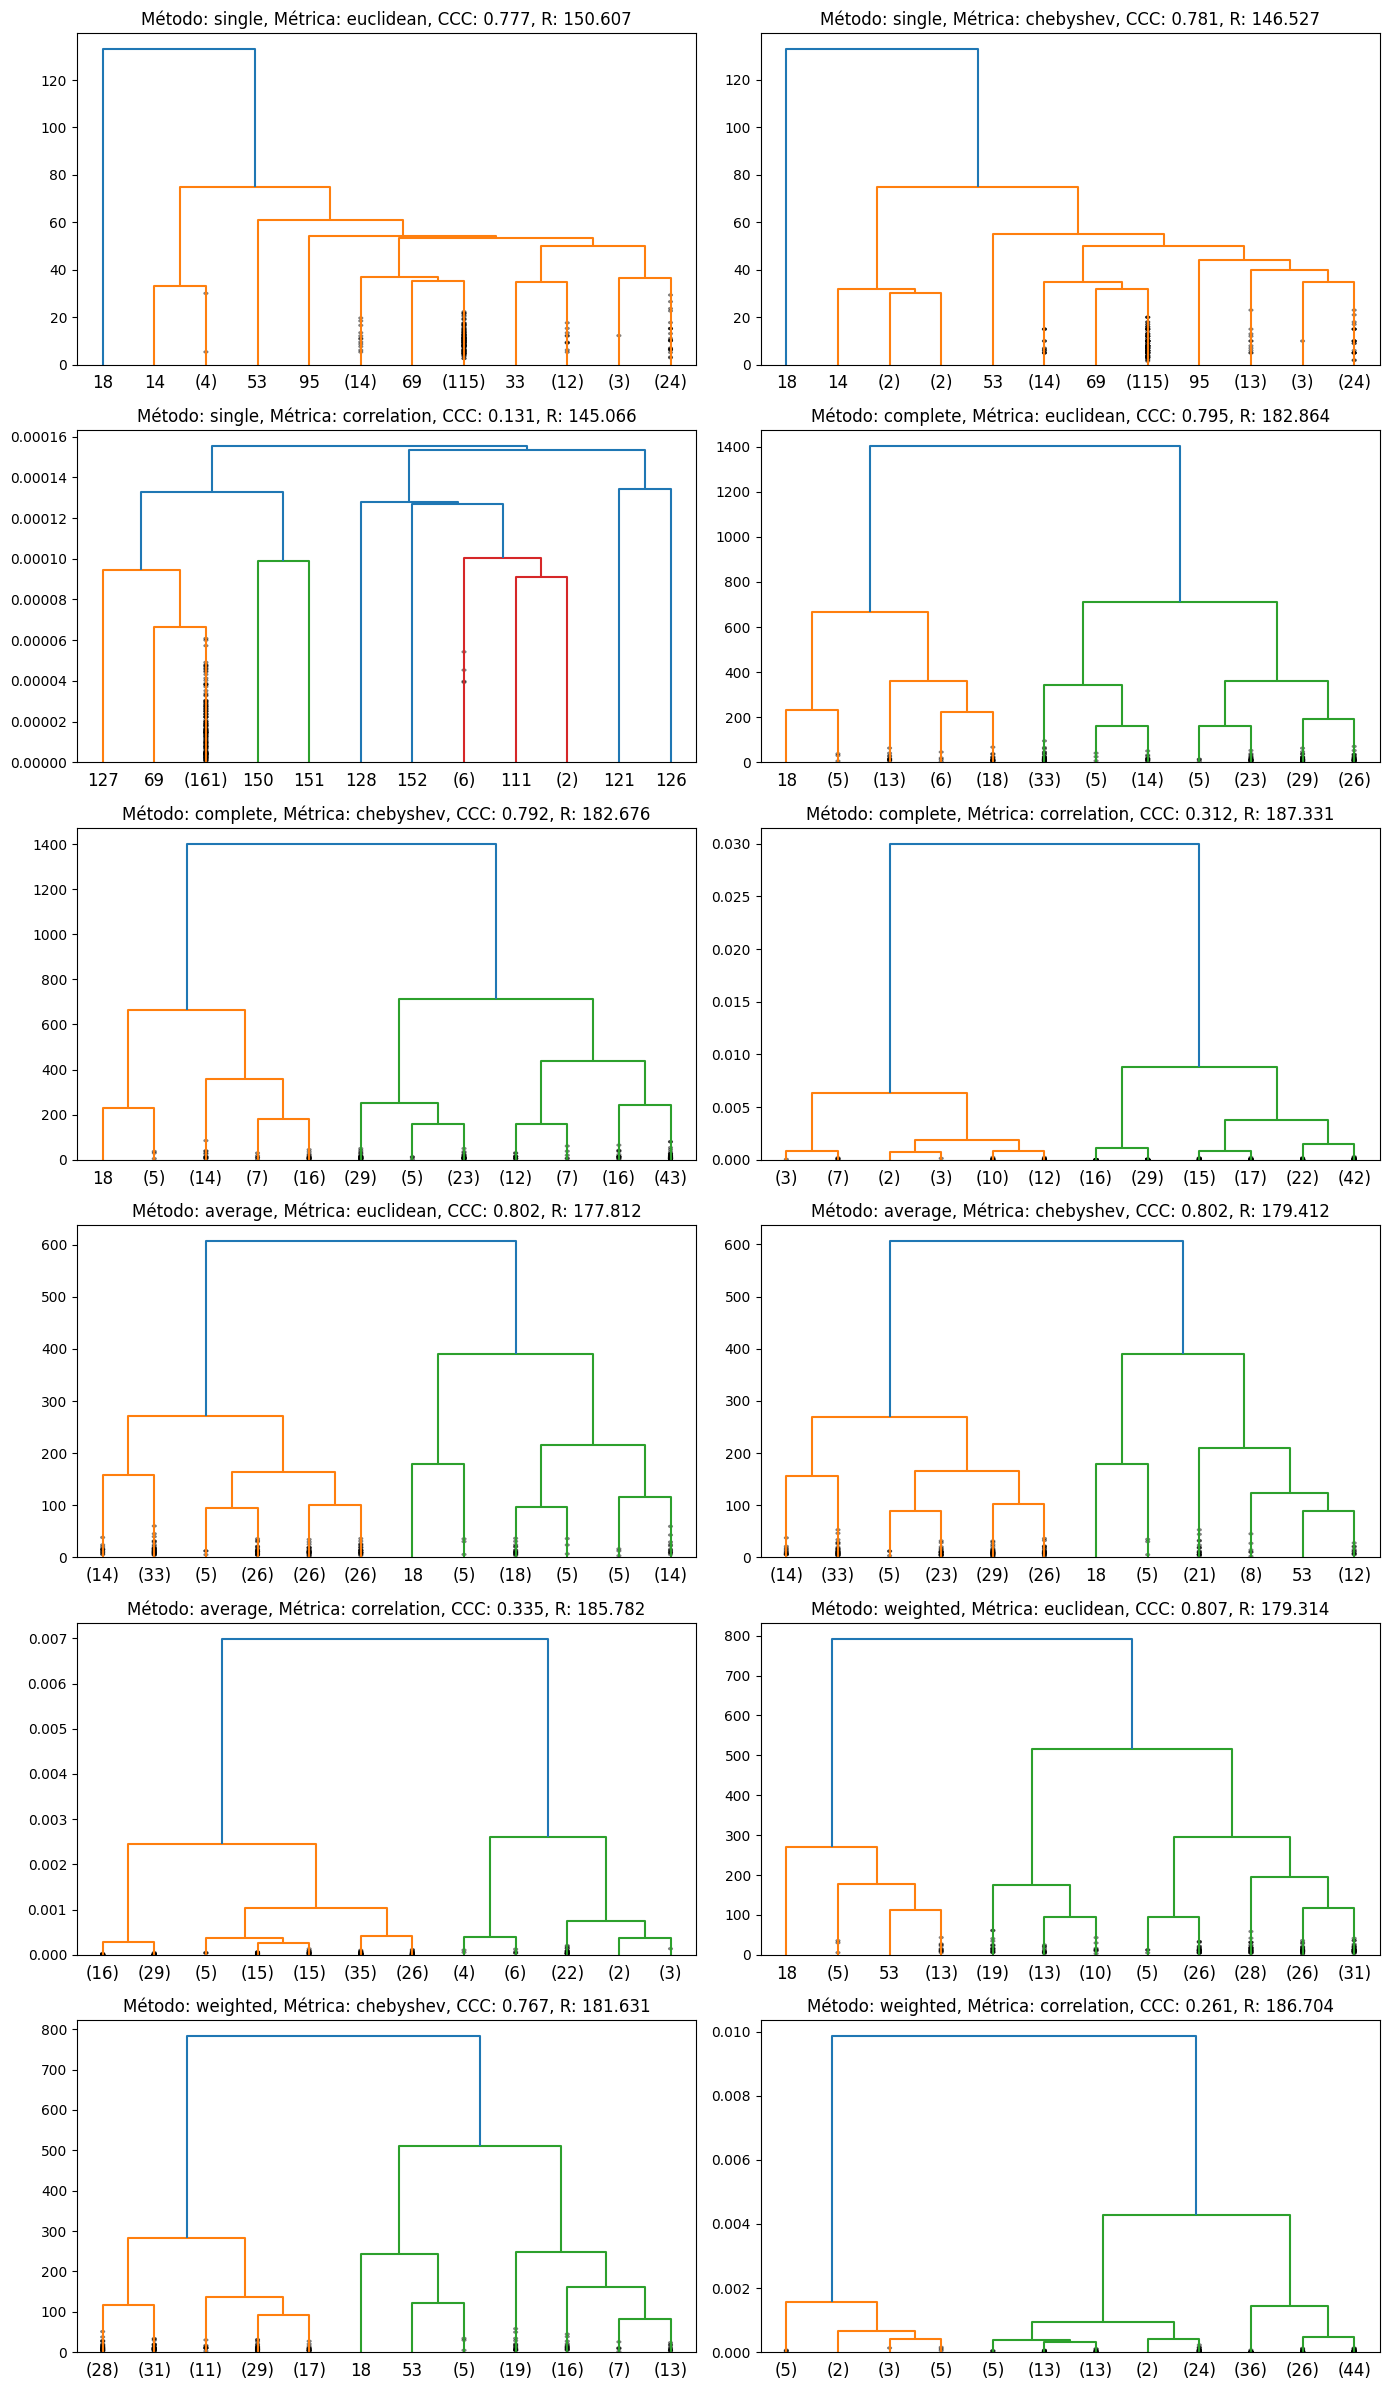

In [ ]:
# - 'dendrogram': Permite criar e visualizar dendrogramas que mostram a estrutura do agrupamento.
# - 'linkage': Realiza o agrupamento hierárquico, construindo a estrutura do dendrograma.
# - 'cophenet': Calcula o coeficiente cophenético para avaliar a fidelidade do dendrograma.
# - 'inconsistent': Calcula estatísticas inconsistentes para avaliação do dendrograma.
# - 'fcluster': Permite realizar cortes no dendrograma para obter grupos específicos.
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, inconsistent, fcluster

# Calcula a matriz de distâncias pair-wise entre pontos em um conjunto de dados. Essa matriz é frequentemente usada como entrada para o método de ligação no agrupamento hierárquico.
from scipy.spatial.distance import pdist

#Facilita a criação de todas as combinações possíveis de métodos de ligação e métricas de distância.
import itertools

#É usado para criar gráficos e plotar os dendrogramas. O alias 'plt' é comumente usado para facilitar o uso das funções da biblioteca de criação de gráficos 'matplotlib'.
import matplotlib.pyplot as plt

methods = ['single', 'complete', 'average', 'weighted']
metrics = ['euclidean', 'chebyshev', 'correlation']
combination = list(itertools.product(methods, metrics))

# Definindo uma lista de métodos de ligação e métricas de distância para combinar

CCC, R = [], []

# Inicializando listas para armazenar os coeficientes cophenéticos e estatísticas inconsistentes

# Criando uma figura com subplots para os dendrogramas
fig, axes = plt.subplots(len(combination)//2, 2, figsize=(14, 2 * len(combination)))

for i, (method, metric) in enumerate(combination):
    # Iterando por todas as combinações de métodos e métricas

    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Calculando a posição do subplot atual

    Z = linkage(df.values, method=method, metric=metric)
    # Realizando o agrupamento hierárquico com o método e métrica especificados, armazenando em Z

    CCC.append(cophenet(Z, pdist(df.values))[0])
    R.append(inconsistent(Z, 5))

    # Calculando o coeficiente cophenético e as estatísticas inconsistentes para avaliação do agrupamento

    dendrogram(Z, truncate_mode='lastp', p=12, show_contracted=True, labels=df.index, ax=ax)
    # Plotando o dendrograma com algumas configurações, incluindo rótulos

    ax.set_title('Método: {}, Métrica: {}, CCC: {:.3f}, R: {:.3f}'.format(method, metric, CCC[-1], np.sum(R[-1][:, 3])))

    # Definindo o título do subplot com informações sobre o método, métrica, CCC e estatísticas inconsistentes

plt.tight_layout()
plt.show()


In [ ]:
# Convertendo 'Combination' em um array NUMPY
combination = np.array(combination)

#Convertendo 'CCC' em array NUMPY
CCC = np.array(CCC)

# Ordenando os índices de 'CCC' em ordem decrescente usando o algoritmo QuickSort e armazenando em 'arg'
arg = np.argsort(CCC, kind = 'quicksort')[::-1]

# Selecionando os três melhores pares com base nos índices ordenados e armazenando em 'top_3'
top_3 = combination[arg[:3]]

# Imprimindo uma mensagem indicando que os três melhores pares serão listados
print('3 principais pares:')

# Iniciando um loop para listar informações sobre os três melhores pares
for i, element in enumerate(top_3):
  # Imprimindo informações sobre o método, a métrica e o valor CCC para cada par
  print(f'Metodo : {element[0]}, Metrica: {element[1]}, com o CCC {CCC[arg[i]]}.')

3 principais pares:
Metodo : weighted, Metrica: euclidean, com o CCC 0.8066329069977862.
Metodo : average, Metrica: euclidean, com o CCC 0.8022638349313509.
Metodo : average, Metrica: chebyshev, com o CCC 0.802080714124788.


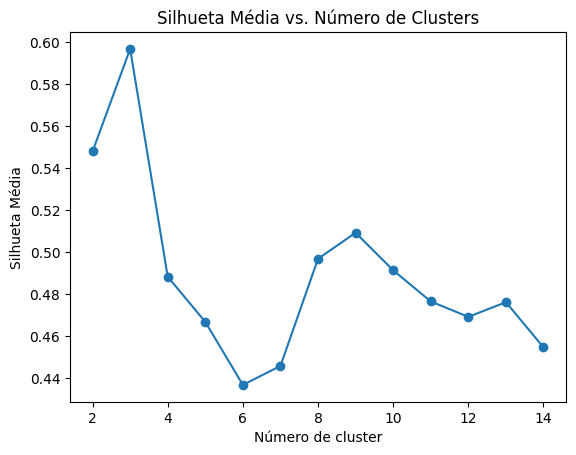

In [ ]:
# Importa funções relacionadas à métrica de silhueta para avaliação de clusters.
from sklearn.metrics import silhouette_samples, silhouette_score

# Inicializa listas para armazenar a pontuação média de silhueta e os valores de k (número de clusters) que serão testados.
silhouette_avg = []
k_values = range(2,15)

# Loop que itera sobre diferentes valores de k (número de clusters).
for k in k_values:
  # Realiza o agrupamento hierárquico (hierarchical clustering) com o método 'weighted' e métrica 'euclidean'.
  # Em seguida, atribui cada ponto de dados a um cluster usando 'fcluster' com o critério 'maxclust'.
  clusters = fcluster(linkage(df.values, method='weighted', metric='euclidean'), k, criterion='maxclust')

  # Calcula a pontuação média de silhueta para os clusters obtidos e a adiciona à lista 'silhouette_avg'
  silhouette_avg.append(silhouette_score(df, clusters))

plt.plot(k_values, silhouette_avg, marker = 'o')
plt.xlabel('Número de cluster')
plt.ylabel('Silhueta Média')
plt.title('Silhueta Média vs. Número de Clusters')
plt.show()

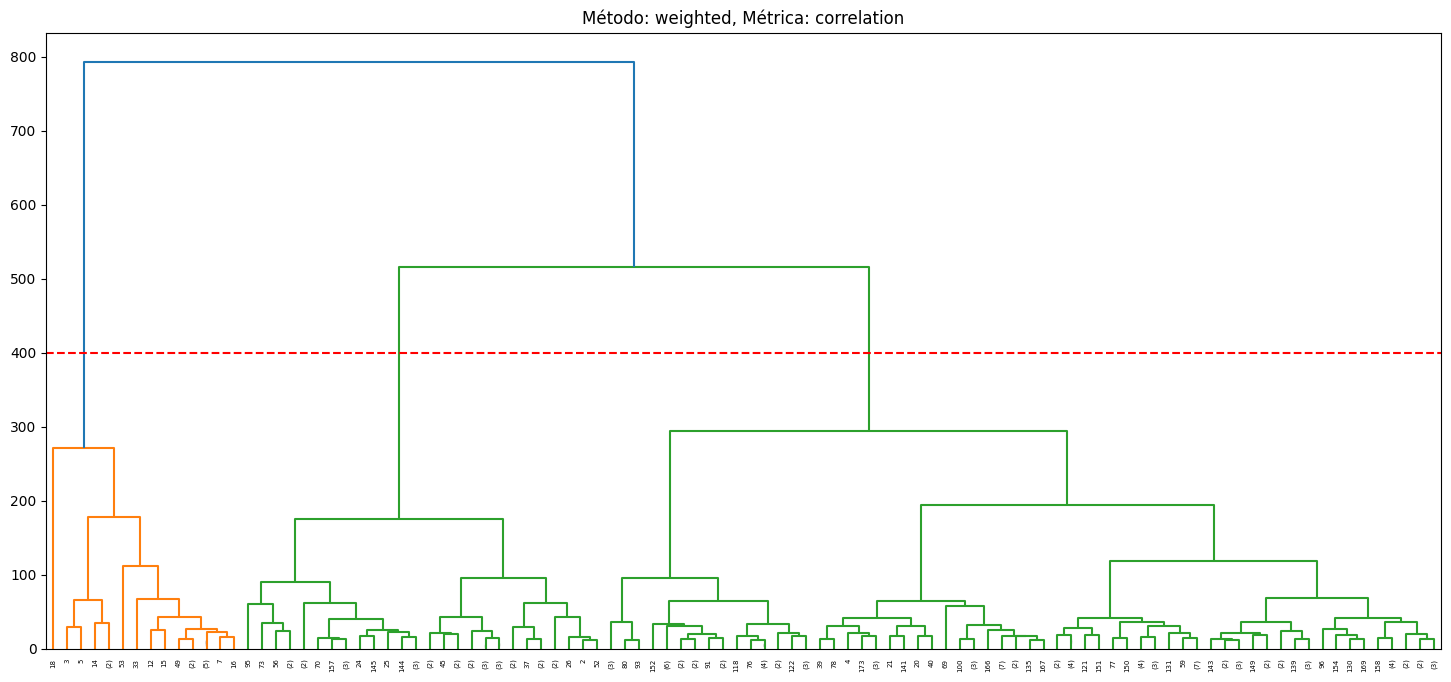

O valor ótimo de k é: 3


In [ ]:
# Calculando o linkage hierárquico dos dados no DataFrame 'df' usando o método 'weighted' e a métrica 'euclidean'
Z = linkage(df.values, method='weighted', metric='euclidean')

# Criando uma figura com dimensões de 18x8 polegadas para o dendrograma
plt.figure(figsize=(18, 8))

# Gerando o dendrograma com 'truncate_mode' definido como 'lastp' e 'p' igual a 100,
# mostrando os clusters contraídos e atribuindo rótulos aos clusters com base nos índices em 'df.index'
dendrogram(Z, truncate_mode='lastp', p=100, show_contracted=True, labels=df.index)

# Definindo o título do gráfico com base nos valores das variáveis 'method' e 'metric'
plt.title('Método: {}, Métrica: {}'.format(method, metric))

# Adicionando uma linha horizontal vermelha no dendrograma com altura 'y=400' e estilo de linha '--',
# marcando o valor de 'k' no dendrograma
plt.axhline(y=400, color='r', linestyle='--', label='k')

# Exibindo o gráfico
plt.show()

# Imprimindo uma mensagem indicando o valor ótimo de 'k' é igual a 3
print('O valor ótimo de k é: 3')
